# Assignment 9: Bayesian Analysis

### Conditional Probability 

Q.1. Let's say there are about 8.6 million people living in New-York and about 56 % of them speak Spanish. Let's also assume there are about 7.5 billion people on earth.

If I randomly pick someone living on Earth (an Earthian?), what are the chances that this person is a Spanish speaking New-Yorker?

Q.2 Explain in few terms what is Naive Bayes. What is it considered Naive?

Q.3 Let's suppose we have a Deck of Cards (52 cards). We pick a card at random. What is the probability of the card we picked being a king, given that it is a face card. 

### A.1
p(x,y): Probability that random person on Earth is speaks Spanish (x) and lives in New York (y).<br />
p(x|y): Probability that person speaks Spanish (x) given that they live in New York (y).<br />
p(y): Probability that person lives in New York (y).<br />
<br />
p(x,y) = p(x|y) * p(y) = 0.56 * (8.6e6 / 7.5e9) * 100.<br />
p(x,y) = 0.064%<br />


### A.2
Bayes classifiers are probabilistic classifiers that are able to predict the probability distribution over a set of classes. They are Bayesian, because they apply Bayes' theorem to determine the conditional probability. Naive Bayes classifiers are considered naive, because they assume that all of the features are independent of each other.


### A.3
There are three face cards: king, queen, jack. There are an equal number of each face cards (4) in a standard deck of cards (52). Since the three face cards are each equally probable of being selected, the probability of picking a king, given that it is a face card, is 1/3 or 33.3%.

In [1]:
import pandas as pd

data = pd.read_csv('data/shingles.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 6 columns):
Rash                       1841 non-null object
SwollenLymphNode           1841 non-null object
Chills                     1841 non-null object
PolymeraseChainReaction    1841 non-null object
VZVAntibodyTest            1841 non-null object
Blisters                   1841 non-null object
dtypes: object(6)
memory usage: 86.4+ KB
None


,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
0,no,no,no,no,pos,no
1,yes,no,no,no,neg,no
2,no,no,no,no,neg,no
3,no,no,no,no,neg,no
4,no,no,no,no,neg,no


Q.4. Does this data contain any missing values?

In [2]:
data.isnull().sum()

Rash                       0
SwollenLymphNode           0
Chills                     0
PolymeraseChainReaction    0
VZVAntibodyTest            0
Blisters                   0
dtype: int64

No, the data does not contain any missing values.

Q.5. Split the data into 70/30 train test

In [3]:
data.stack().unique()

array(['no', 'pos', 'yes', 'neg', 'po'], dtype=object)

In [4]:
from sklearn.model_selection import train_test_split

data = data.replace({'no': 0, 'pos': 1, 'yes': 1, 'neg': 0, 'po': 1})

target = 'VZVAntibodyTest'
features = list(data.drop(target,axis=1).columns.values)

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [5]:
data.stack().unique()

array([0, 1], dtype=int64)

Q.6. Train a Gaussian Naive Bayes model, a Multinomial Naive Bayes and a Bernoulli Naive Bayes on the dataset. Compute the accuracy for each. Explain your results. 

In [6]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score 

## Gaussian Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

## Multinomial Naive Bayes
mnb = MultinomialNB().fit(X_train, y_train)

y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

## Bernoulli Naive Bayes
bnb = BernoulliNB().fit(X_train, y_train)

y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)


## Accuracy Scores
print("Gaussian Naive Bayes Accuracy Score    = %.3f" % (accuracy_gnb))
print("Multinomial Naive Bayes Accuracy Score = %.3f" % (accuracy_mnb))
print("Bernoulli Naive Bayes Accuracy Score   = %.3f" % (accuracy_bnb))

## Comments
#Each of these NB models have roughly similar accuraccies.

Gaussian Naive Bayes Accuracy Score    = 0.609
Multinomial Naive Bayes Accuracy Score = 0.584
Bernoulli Naive Bayes Accuracy Score   = 0.618


## Inference in Bayesian networks

Q.7. Imagine you are at party on Sunday and have an exam on Monday.  If you drink
too much alcolhol at the birthday party, you most likely have problems concentrating the next day, which
would reduce the probability that you pass the exam.  Another consequence of the reduced concentration
might be increased stress with your roommate.

Consider the following random variables that can assume the values "true" or "false":
A:  drinking too much alcolhol on Sunday;
B:  Dairy allergy strikes;
C:  reduced concentration on Monday;
D:  you pass the exam;
E:  stress with your roommates.

a) Draw the corresponding Bayesian network.

b) Search for conditional dependencies and independencies.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def plot_circle(ax_, x_, y_, lx_, ly_, label_):
    ax_.add_artist(plt.Circle((x_, y_), 0.13, color='blue', fill=False, linewidth=2))
    ax_.text(lx_, ly_, label_, size=15, horizontalalignment='center')

def plot_arrow(ax_, x_, y_, dx_, dy_):
    ax_.arrow(x_, y_, dx_, dy_, head_width=0.02, head_length=0.02, fc='k', ec='k', linewidth=2)

### a) Bayesian Network Diagram

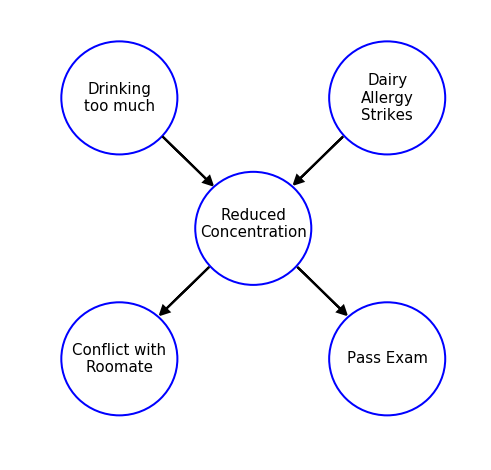

In [9]:
fig, ax = plt.subplots(figsize=(8,8))

plot_circle(ax, 0.2, 0.8, 0.2, 0.77, 'Drinking\ntoo much')
plot_circle(ax, 0.5, 0.5, 0.5, 0.48, 'Reduced\nConcentration')
plot_circle(ax, 0.8, 0.8, 0.8, 0.75, 'Dairy\nAllergy\nStrikes')
plot_circle(ax, 0.2, 0.2, 0.2, 0.17, 'Conflict with\nRoomate')
plot_circle(ax, 0.8, 0.2, 0.8, 0.19, 'Pass Exam')

plot_arrow(ax, 0.298, 0.71, 0.097, -0.097)
plot_arrow(ax, 0.6, 0.41, 0.095, -0.095)
plot_arrow(ax, 0.7, 0.71, -0.095, -0.095)
plot_arrow(ax, 0.4, 0.41, -0.095, -0.095)

plt.axis('off')
plt.show()

### b) Search for conditional dependencies and independencies.

The variables A: Drinking too much and B: Dairy allergy strikes are both independencies. They do not depend on any of the other conditions included in the Bayesian network here. The variable C: Reduced concentration conditionally depends on both variables A and B. Both variables D: pass the exam and E: stress with your roommate both conditionally depend upon variable C.